In [1]:
from utils.fileUtils.sr import NMSSM_MX_700_MY_400

In [2]:
datTree = Tree(JetHT_Data_UL)
datTree.initialize_t6_X()

X = datTree.t6_X

In [3]:
sigTree = Tree(NMSSM_MX_700_MY_400)
sigTree.initialize_t6_X()

sig_X = sigTree.t6_X

In [4]:
sigTree.t6_jet_pt[sigTree.t6_jet_higgsIdx == 0]
ak.argsort(sigTree.t6_jet_pt[sigTree.t6_jet_higgsIdx == 0], axis=1)[:,0]

<Array [1, 0, 0, 1, 1, 1, ... 0, 1, 1, 1, 1, 1] type='43836 * int64'>

Control region definitions:

<span style="font-family:Courier;">SR<sup>hs</sup> = <span style="color:green">pass</span> m<sub>H</sub> veto, <span style="color:green">pass</span> b<sub>sum</sub> veto  
SR<sup>ls</sup> = <span style="color:green">pass</span> m<sub>H</sub> veto, <span style="color:red">fail</span> b<sub>sum</sub> veto  
CR<sup>hs</sup> = <span style="color:red">fail</span> m<sub>H</sub> veto, <span style="color:green">pass</span> b<sub>sum</sub> veto  
CR<sup>ls</sup> = <span style="color:red">fail</span> m<sub>H</sub> veto, <span style="color:red">fail</span> b<sub>sum</sub> veto</span>

### <span style="font-variant:small-caps;"><font size=4>Control Region</font></span>: <font size=3>Thresholds</font>

Remember:


| | `SIGNAL REGION`   | `VALIDATION REGION`  | `CONTROL REGION`   |
| - | -------- | ----------- | ------- |
| Within | m<sub>H</sub> &#177; 30 GeV | m<sub>H</sub> &#177; 60 GeV | |
| Outside |  | m<sub>H</sub> &#177; 30 GeV | m<sub>H</sub> &#177; 60 GeV |

In [5]:
# edges of mH windows
SR_edge = 25 # GeV
VR_edge = 60 # GeV
CR_edge = 120 # GeV

In [6]:
mH = 125 # GeV

SR_lo = mH - SR_edge
SR_hi = mH + SR_edge

VR_lo = mH - VR_edge
VR_hi = mH + VR_edge

CR_lo = mH - CR_edge
CR_hi = mH + CR_edge

In [7]:
sig_Dm_cand = abs(sigTree.t6_higgs_m - 125)

# triple mass veto
sig_SR = ak.all(sig_Dm_cand <= SR_edge, axis=1) # SR
sig_VR = ak.all(sig_Dm_cand > SR_edge, axis=1) & ak.all(sig_Dm_cand <= VR_edge, axis=1) # VR
sig_CR = ak.all(sig_Dm_cand > VR_edge, axis=1) # CR

print("Triple mass veto")
print("SR:",int(ak.sum(sig_SR)*sigTree.scale))
print("VR:",int(ak.sum(sig_VR)*sigTree.scale))
print("CR:",int(ak.sum(sig_CR)*sigTree.scale))

Triple mass veto
SR: 2361
VR: 363
CR: 799


In [8]:
dat_6sums = ak.sum(datTree.t6_jet_btag, axis=1)/6

In [9]:
#### DATA ####

# dat_m_cand = datTree.t6_higgs_m[:,2]
dat_Dm_cand = abs(datTree.t6_higgs_m - 125)
dat_Dm      = datTree.t6_higgs_m - 125
dat_Dm_pos  = ak.all(datTree.t6_higgs_m - 125 > 0, axis=1)
dat_Dm_neg  = ak.all(datTree.t6_higgs_m - 125 < 0, axis=1)

# triple mass veto
dat_SR = ak.all(dat_Dm_cand <= SR_edge, axis=1) # SR
dat_VR = ak.all(dat_Dm_cand > SR_edge, axis=1) & ak.all(dat_Dm_cand <= VR_edge, axis=1) # VR
dat_CR = ak.all(dat_Dm_cand > VR_edge, axis=1) # CR

hi_m = ak.all(dat_Dm < -SR_edge, axis=1)
lo_m = ak.all(dat_Dm > -VR_edge, axis=1)
dat_SRlo = ak.all(dat_Dm >= -SR_edge, axis=1) # SR
# dat_VRlo = ak.all(dat_Dm[dat_Dm_neg] < -SR_edge, axis=1) & ak.all(dat_Dm[dat_Dm_neg] >= -VR_edge, axis=1) # VR
dat_VRlo = hi_m & lo_m # VR
dat_CRlo = ak.all(dat_Dm < -VR_edge, axis=1) # CR

hi_m = ak.all(dat_Dm <= VR_edge, axis=1)
lo_m = ak.all(dat_Dm > SR_edge, axis=1)
dat_SRhi = ak.all(dat_Dm <= SR_edge, axis=1) # SR
dat_VRhi = hi_m & lo_m # VR
dat_CRhi = ak.all(dat_Dm > VR_edge, axis=1) # CR

print(ak.sum(dat_VRlo))
print(ak.sum(dat_VRhi))

print("Triple mass veto")
print("SR:",ak.sum(dat_SR))
print("VR:",ak.sum(dat_VR))
print("CR:",ak.sum(dat_CR))

14520
8784
Triple mass veto
SR: 35659
VR: 29087
CR: 70259


In [10]:
dat_CR_lo = dat_Dm_neg & dat_CRlo
dat_CR_hi = dat_Dm_pos & dat_CRhi

dat_VR_lo = dat_Dm_neg & dat_VRlo
dat_VR_hi = dat_Dm_pos & dat_VRhi

print(ak.sum(dat_CR_lo))
print(ak.sum(dat_CR_hi))

print(ak.sum(dat_VR_lo))
print(ak.sum(dat_VR_hi))

4224
65338
14520
8784


In [11]:
nbins = 60
mBins = np.linspace(0,2000,nbins)

In [12]:
max_mass = 2000
min_mass = 250

In [13]:
n_bs = 6

In [14]:
sig_sums = ak.sum(sigTree.t6_jet_btag, axis=1)[sig_SR]/n_bs
dat_sums = ak.sum(datTree.t6_jet_btag, axis=1)[dat_CR]/n_bs

n_sig, edges = np.histogram(sig_sums.to_numpy(), bins=score_bins)
n_dat, edges = np.histogram(dat_sums.to_numpy(), bins=score_bins)

In [15]:
sum_eff = []
sum_rej = []

for cut in edges[:-1]:
    sum_eff.append(n_sig[edges[:-1] >= cut].sum()/n_sig.sum())
    sum_rej.append(n_dat[edges[:-1] < cut].sum()/n_dat.sum())

sum_eff = np.append(1, np.asarray(sum_eff))
sum_rej = np.asarray(sum_rej)

dx = sum_eff[:-1] - sum_eff[1:]
auc = np.sum(sum_rej*dx)
sum_rej = np.append(sum_rej, 1)

In [17]:
opt_arg = (abs(sum_eff-auc)+abs(sum_rej-auc)).argmin()
opt_cut = score_bins[opt_arg]
print(opt_cut)

print(f"Optimal score cut = {opt_cut}")

p_sig_hi = ak.sum(sig_sums >= opt_cut)/len(sig_sums)
p_sig_lo = ak.sum(sig_sums < opt_cut)/len(sig_sums)

p_bkg_hi = ak.sum(dat_sums >= opt_cut)/len(dat_sums)
p_bkg_lo = ak.sum(dat_sums < opt_cut)/len(dat_sums)

print(p_sig_hi,p_bkg_hi)
print(p_sig_lo,p_bkg_lo)

0.66
Optimal score cut = 0.66
0.7252932607528942 0.12135100129520773
0.2747067392471057 0.8786489987047923


In [18]:
p_sig_hi = ak.sum(sig_sums >= opt_cut)/len(sig_sums)
p_sig_lo = ak.sum(sig_sums < opt_cut)/len(sig_sums)

p_bkg_hi = ak.sum(dat_sums >= opt_cut)/len(dat_sums)
p_bkg_lo = ak.sum(dat_sums < opt_cut)/len(dat_sums)

print(p_sig_hi,p_bkg_hi)
print(p_sig_lo,p_bkg_lo)

0.7252932607528942 0.12135100129520773
0.2747067392471057 0.8786489987047923


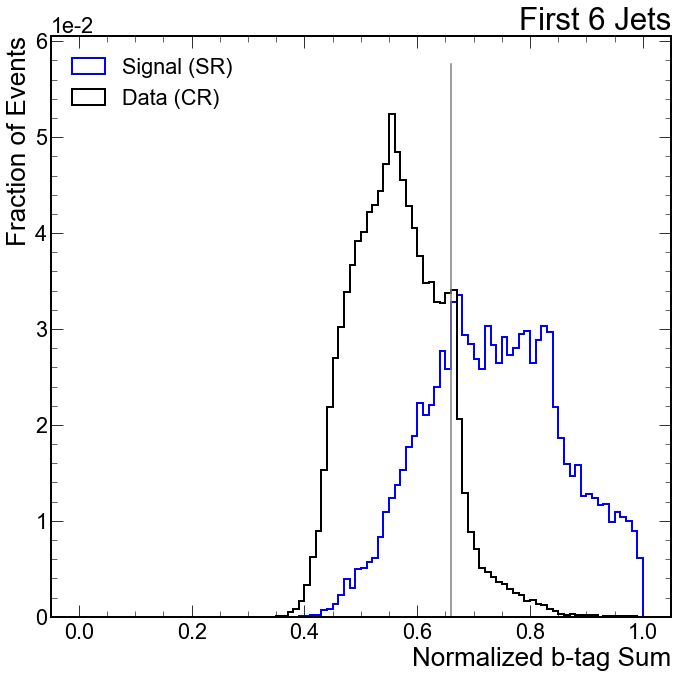

In [19]:
score_bins = np.linspace(0,1,101)

fig, ax = plt.subplots()

ax.set_title('First 6 Jets', loc='right')
n_s, edges = Hist(x_bins(score_bins), weights=n_sig/n_sig.sum(), bins=score_bins, ax=ax, label='Signal (SR)', color='blue')
n_data, edges = Hist(x_bins(score_bins), weights=n_dat/n_dat.sum(), bins=score_bins, ax=ax, label='Data (CR)', color='black')
if n_s.max() > n_data.max(): nMax = n_s.max()
else: nMax = n_data.max()
ax.plot([opt_cut, opt_cut],[0,nMax*1.1],'gray')
ax.legend(fontsize='smaller', loc=2)
ax.set_xlabel(r'Normalized b-tag Sum')
ax.set_ylabel('Fraction of Events')

plt.tight_layout()

# fig.savefig(f'plots/{sigTree.mXmY}_bsum.pdf')

In [21]:
#### DATA ####
# score veto
dat_ls_mask = ak.sum(datTree.t6_jet_btag, axis=1)/6 < opt_cut # ls
dat_hs_mask = ak.sum(datTree.t6_jet_btag, axis=1)/6 >= opt_cut # hs

dat_CR_lo_ls = dat_ls_mask & dat_CR_lo
dat_CR_hi_ls = dat_ls_mask & dat_CR_hi
dat_CR_lo_hs = dat_hs_mask & dat_CR_lo
dat_CR_hi_hs = dat_hs_mask & dat_CR_hi

dat_VR_lo_ls = dat_ls_mask & dat_VR_lo
dat_VR_hi_ls = dat_ls_mask & dat_VR_hi
dat_VR_lo_hs = dat_hs_mask & dat_VR_lo
dat_VR_hi_hs = dat_hs_mask & dat_VR_hi

# combination
dat_CRls_mask = dat_CR & dat_ls_mask
dat_CRhs_mask = dat_CR & dat_hs_mask
dat_VRls_mask = dat_VR & dat_ls_mask
dat_VRhs_mask = dat_VR & dat_hs_mask
dat_SRls_mask = dat_SR & dat_ls_mask

In [22]:
print(ak.sum(dat_CR_lo_ls))
print(ak.sum(dat_CR_hi_ls))
print(ak.sum(dat_CR_lo_hs))
print(ak.sum(dat_CR_hi_hs))

TF_lo = ak.sum(dat_CR_lo_hs)/ak.sum(dat_CR_lo_ls)
TF_hi = ak.sum(dat_CR_hi_hs)/ak.sum(dat_CR_hi_ls)

print()
print(TF_lo)
print(TF_hi)

3645
57478
579
7860

0.1588477366255144
0.13674797313754827


In [23]:
### SIGNAL ###
# score veto
sig_ls_mask = ak.sum(sigTree.t6_jet_btag, axis=1)/6 < opt_cut # ls
sig_hs_mask = ak.sum(sigTree.t6_jet_btag, axis=1)/6 >= opt_cut # hs

# combination
sig_SRhs_mask = sig_SR & sig_hs_mask
sig_SRls_mask = sig_SR & sig_ls_mask
sig_VRhs_mask = sig_VR & sig_hs_mask
sig_VRls_mask = sig_VR & sig_ls_mask
sig_CRhs_mask = sig_CR & sig_hs_mask
sig_CRls_mask = sig_CR & sig_ls_mask

In [24]:
TF = ak.sum(dat_CRhs_mask)/ak.sum(dat_CRls_mask)
TF

0.13811089692708925